# <p style="text-align: center;"> <a href='https://www.kaggle.com/c/digit-recognizer'>Kaggle competition: Digit Recognizer</a></p>
* [Logistic regression](#logistic-regression)
* [SVM](#svm)
* [KNN](#knn)
* [CNN](#cnn)

# Preparation

In [1]:
%matplotlib inline
import logging
import numpy as np
import pandas as pd
import timeit
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

logger = logging.getLogger()
logger.setLevel(logging.INFO)

train_data = pd.read_csv('./train.csv').sample(frac=1)
submission_test_data = pd.read_csv('./test.csv')
pixel_columns = ['pixel' + str(i) for i in range(784)]

X_train, X_test, y_train, y_test = train_test_split(train_data[pixel_columns], train_data['label'], test_size=0.10)

In [18]:
# Some functions

def plot_result(y_truth, y_pred):
    prec, recall, _, _ = precision_recall_fscore_support(y_truth, y_pred, average='macro')
    print("Precision: %.2f  - Recall: %.2f" % ((prec * 100,recall * 100)))

## Train on 80% of data, Test on 20% of data

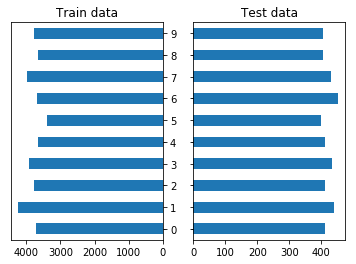

In [2]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)
ax.invert_xaxis()
ax.yaxis.tick_right()
y_train.value_counts().sort_index().to_frame().plot.barh(ax=ax, title="Train data", legend=False)
y_test.value_counts().sort_index().to_frame().plot.barh(ax=ax2, title="Test data", legend=False)
plt.show()

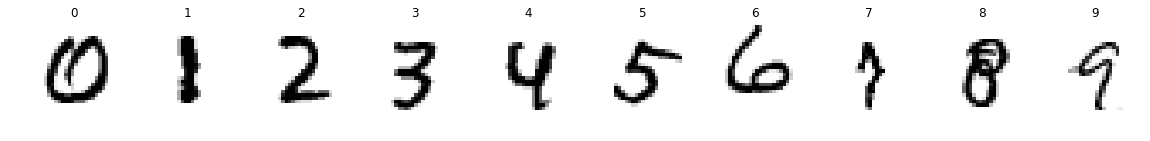

In [106]:
plt.figure(num='digit',figsize=(20, 5))
for idx, row in train_data.sample(frac=1).sort_values(by=['label']).drop_duplicates(subset=['label']).iterrows():
    image = np.array(row[pixel_columns]).reshape([-1,28,28,1])
    plt.subplot(1, 10, row['label'] + 1)
    plt.title(row['label'])
    plt.axis('off')
    plt.imshow(np.squeeze(image),cmap=plt.cm.binary)

## <a class="anchor" id="logistic-regression">Logistic regression</a>

In [19]:
from sklearn.linear_model import LogisticRegression
s = timeit.default_timer()
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

y_prediction = clf.predict(X_test)
e = timeit.default_timer()
print("Time: %fs" % (e-s))
plot_result(y_test, y_prediction)

Time: 8.599948s
Precision: 91.73  - Recall: 91.70


/home/rictus/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Logistic regression is a good start. Many efforts can be made to go up to 92% but that's not worth.

## <a class="anchor" id="svm">SVM</a>

In [66]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo', kernel='poly', degree=2)
s = timeit.default_timer()
logger.info("Training")
clf.fit(X_train, y_train)
logger.info("Predict")
y_prediction = clf.predict(X_test)
logger.info("Metrics") 
e = timeit.default_timer()
print("Time: %fs" % (e-s))
plot_result(y_test, y_prediction)

/home/rictus/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rictus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


Time: 144.085819s
Precision: 97.36  - Recall: 97.32


Polynomial SVC performs well : around 97% of precision and recall. Using a degree of 2 might be related with the fact that we are working with 2d images.

## Show wrong predictions with title  "truth -> prediction"

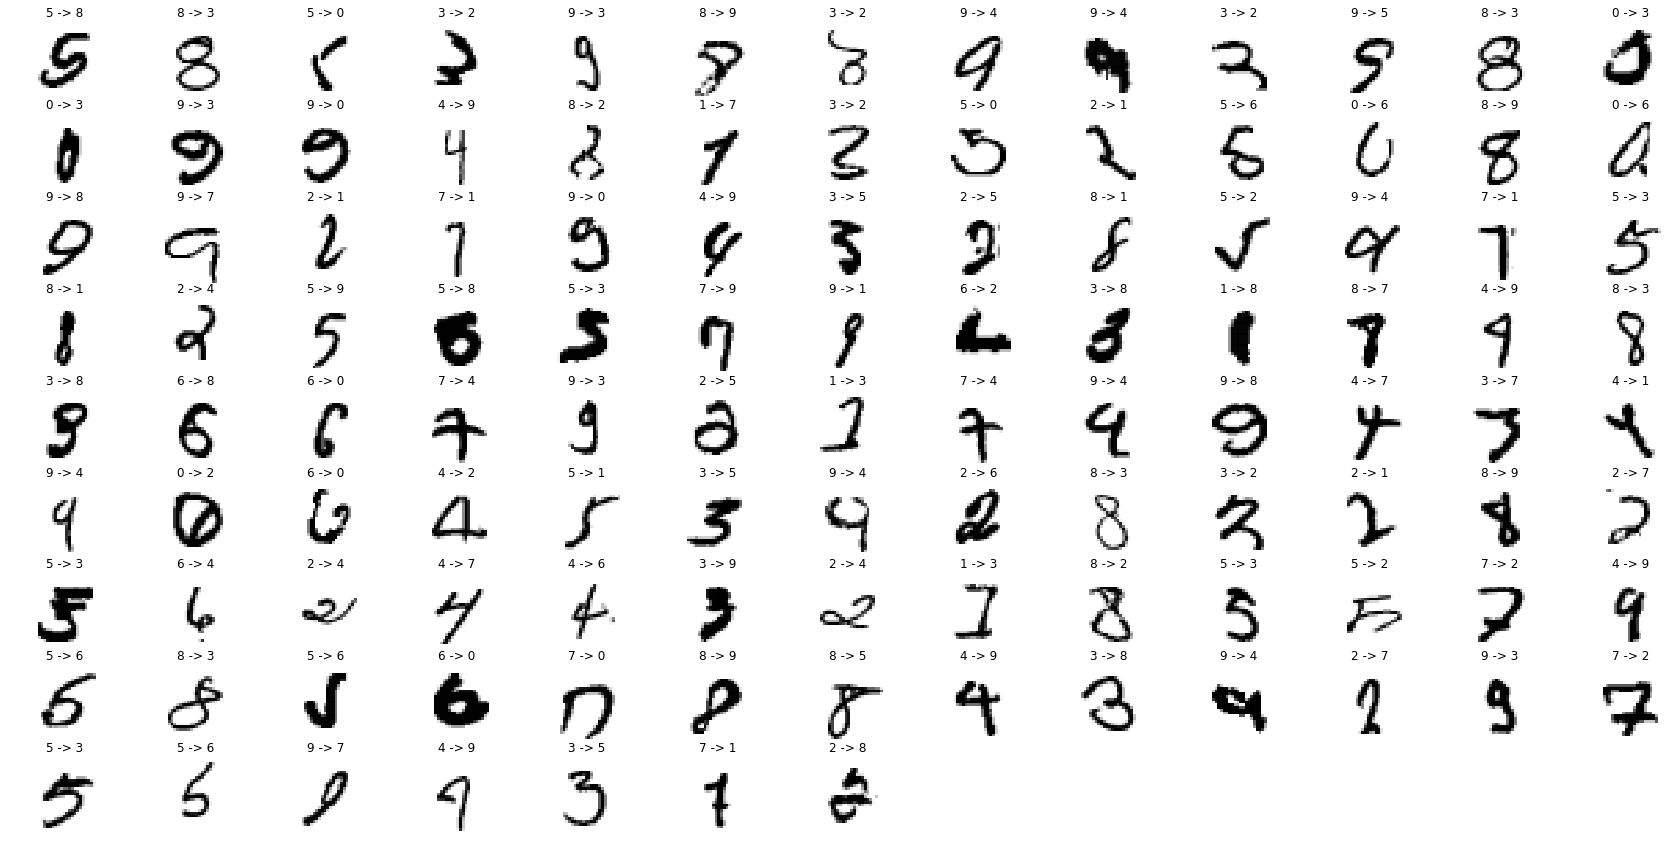

In [132]:
##### y = pd.DataFrame(zip(y_test, y_prediction), columns=['test', 'pred'])
x_test = X_test.reset_index(drop=True)
wrong_predictions = y.query('test != pred')
wrong_predictions = pd.merge(wrong_predictions, x_test.iloc[list(wrong_predictions.index.values)], left_index=True, right_index=True)
# wrong_predictions['pairs'] = wrong_predictions['test'].map(str) + wro5ng_predictions['pred'].map(str)


cnt = 0
plt.figure(num='digit',figsize=(30, 20))
for _, row in wrong_predictions.iterrows():
    cnt += 1
    image = np.array(row[pixel_columns]).reshape([-1,28,28,1])
    plt.subplot(12, 13, cnt)
    plt.title('%d -> %d' % (row['test'], row['pred']))
    plt.axis('off')
    plt.imshow(np.squeeze(image),cmap=plt.cm.binary)

## <a class="anchor" id="knn">KNN</a>

In [ ]:
from sklearn.neighbors import NearestNeighbors

## <a class="anchor" id="cnn">CNN</a>